# APIキー
※シークレットタブに「OPENAI_API_KEY」を設定
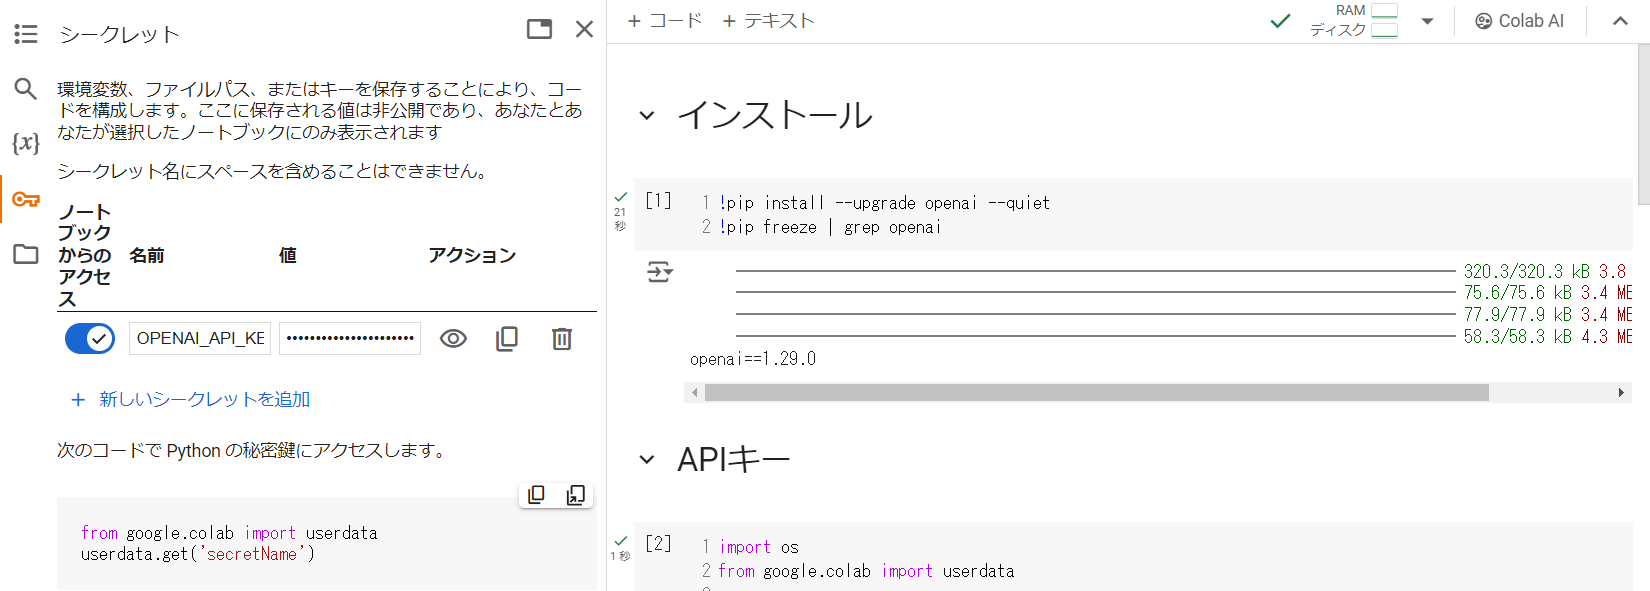

In [1]:
import os
from google.colab import userdata

openai_api_key = userdata.get('OPENAI_API_KEY')
os.environ['OPENAI_API_KEY'] = openai_api_key

# インストール

In [2]:
!pip install --upgrade openai --quiet
!pip freeze | grep openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.3/320.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.1 MB/s eta 0:00:00
openai==1.29.0


# モデル名

In [3]:
# model_name = 'gpt-4o-2024-05-13'
model_name = 'gpt-4o-mini'

# テキスト入力サンプル

In [4]:
from openai import OpenAI

openai_client = OpenAI()

system_text = ''
query = 'こんにちは'
messages = [
    {
        'role': 'system',
        'content': system_text
    },
    {
        'role': 'user',
        'content': query
    }
]

In [5]:
%%time

completion = openai_client.chat.completions.create(
    model = model_name,
    messages = messages,
    temperature = 0.1,
)
print(completion.choices[0].message.content)

こんにちは！今日はどんなお手伝いができますか？
CPU times: user 39.8 ms, sys: 2.99 ms, total: 42.8 ms
Wall time: 736 ms


# 画像入力サンプル

In [6]:
!pip install imread-from-url

  Preparing metadata (setup.py) ... done
  Created wheel for imread-from-url: filename=imread_from_url-0.1.3-py3-none-any.whl size=6617 sha256=9771c2c0ae8c600943dafda076935e5a9f640a44f80abf2496309266b86578b5
  Stored in directory: /root/.cache/pip/wheels/47/24/56/bc160aec720e92305755f5bbf040ae3c81f826b1121c01f184
Successfully built imread-from-url


In [7]:
import cv2
from imread_from_url import imread_from_url

image = imread_from_url(
    'https://raw.githubusercontent.com/Kazuhito00/OpenAI-chat-completions-Colaboratory-Sample/main/sample.jpg'
)

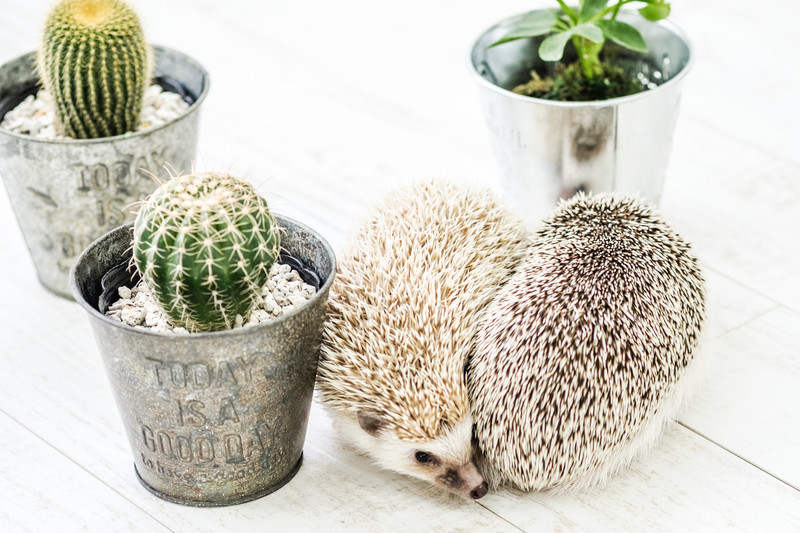

In [8]:
from google.colab.patches import cv2_imshow

cv2_imshow(image)

In [9]:
import base64

_, imencode_image = cv2.imencode('.jpg', image)
base64_image = base64.b64encode(imencode_image)
base64_image = f'data:image/jpg;base64,' + base64_image.decode('ascii')

system_text = ''
query =  'この画像には何が映っていますか？'
messages = [
    {
        'role': 'system',
        'content': system_text
    },
    {
        'role': 'user',
        'content': [
            {
                'type': 'text',
                'text': query
            },
            {
                'type': 'image_url',
                'image_url': {
                    'url': base64_image
                }
            },
        ]
    },
]

In [10]:
%%time

response = openai_client.chat.completions.create(
    model = model_name,
    messages = messages,
    temperature = 0.0,
)

print(response.choices[0].message.content)

この画像には、2匹のハリネズミと3つの鉢植えが映っています。鉢植えのうち2つにはサボテンが植えられており、もう1つには緑の植物が植えられています。鉢は金属製で、1つの鉢には「TODAY IS A GOOD DAY」と書かれています。ハリネズミたちは寄り添っている様子です。
CPU times: user 52.3 ms, sys: 5.9 ms, total: 58.2 ms
Wall time: 3.59 s
